# Machine Learning :  Problem 1
## Linear regression with one variable

## Disclaimer
These exercises are based on the Stanford Machine Learning Course [CS229](http://cs229.stanford.edu) of Andrew Ng. The environment of the exercise have been tuned to the theory content taught at Ravensburg Weingarten University.

We are using the Python programming language. If you don't know Python or if you would like to refresh your memory, take a look at the [Python tutorial](http://docs.python.org/tut/).
We will mostly work with NumPy, the fundamental package for scientific computing in Python. Please read the [NumPy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html). In addition, the documention of MatPlotLib and Scipy lib can be found here: .[MatplotLib](https://matplotlib.org/). [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/).

### 1.A Visualize Dataset

Purpose of this Jupyter Notebook is to guide you with steps folowed to reach a appropriate solution. Simply copying the data from this notebook for solving problem sheets is highly discouraged.

As the first part of the problem, user needs to read the data given the '.txt' format. The given data is read by 'np.loadtext' command with appropritate delimiter specifications as seen in the given text file. Once the data is stored in a variable, user has to define 2 empty arrays (1 for Input and 1 for Output). Using a simple 'for' loop, data is appended in respective arrays.

In [1]:
# Dependencies imported

# For vector computations and notations
import numpy as np 

# For Plotting
import matplotlib.pyplot as plt

# Defining Solving Parameters

alpha = 0.01
acc = 10 ** -4

Solving parameters are defined in previous section. We take learing rate as 0.01 (as specified in the problem). For convergence we take the error between current weight vector and weight vector after next iteration. If this error is more than 10^-4, then the iterations continue. As soon as it falls below the limit, we consider that convergency has reached because **w** vector is not changing much.

In [2]:
############################
##       Read Data        ##
############################

# file in the same directory
data = np.loadtxt('./data.txt', delimiter=',' )

# Initiate a Empty Input feature
x = np.array([])

# Fill values from read-data
for each in data:
    x = np.append(x , [each[0]])

# Initiate a Empty Output feature
y = np.array([])

for each in data:
    y = np.append(y , [each[1]])

Plotting is done using a python library 'matplotlib'. See documention of the library at https://matplotlib.org/

Size of dataset is 97 points


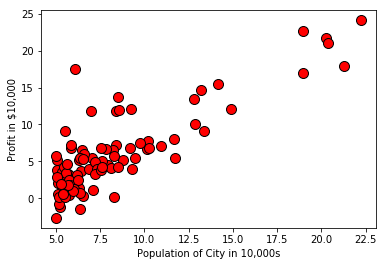

In [3]:
############################
##    Visualize Data      ##
############################

plt.figure()
plt.plot(x,y,'ro', ms=10, mec='k')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.draw()

# Size of data
m = y.size

print('Size of dataset is {} points'.format(m))

### 1.B Implement Gradient Descent

For implementing Gradient Descent algorith, please refer to the slides to get a hold of how the feature function looks for Linear Regression problems. The feature vector for LR looks like below:

$$
\phi = \left(\begin{array}{cc} 
x_i \\
1
\end{array}\right)
$$

User needs to arrange the data stored in 'X' input varible to convert it into a feature function. Simultaneously, the weight vector 'W' is initialized as [0,0].

In [4]:
############################
##      Arrange Data      ##
############################

# Make a linear feature vector
x_vec = np.stack([x, np.ones(m)], axis=1)

# Initiate weight vector
w = np.array([0,0])


### Update equations

The objective of gradient descent is to minimize the mean squared loss
$$
J(w) = \frac{1}{m}\sum_{i=1}^m \big( h_w(x^{(i)}) - y^{(i)}\big)^2
$$
where the hypthesis function $h_w(x)$ is given by the linear model
$$
h_w(x) = w^Tx = w_0 + w_1 x
$$

The parameters of the model are the $w_j$ values. 
These are the values that we will adjust to minimize the gradient of Loss function. This will be done using the gradient descent algorithm which performs the update
$$
\begin{align}
w_j &= w_j - \frac{\alpha}{m} \sum_{i=1}^m \big( h_w(x^{(i)}) - y^{(i)}\big) x_j^{(i)}\\
&= w_j - \frac{\alpha}{m} \frac{\partial J(w)}{\partial w_j} 
\end{align}
$$

with each step of gradient descent, your parameters $w_j$ come closer to the optimal values that will achieve the lowest gradient $\nabla J(w)$. Here, $\alpha$ is called the learning rate.
You may notice that we divided squared error by the number of samples $m$. Alternatively we may have to adjust the learning rate for different sample sizes.

### Implementing gradient descent

Now that we have the hypothesis and the square loss function we can implement the gradient descent routine. First, write a function $\nabla J(w)$ which returns the gradient of the sqaure loss function. The gradient is just a vector with all the partial derivatives

$$
\nabla J(w) = \bigg[\frac{\partial J(w)}{\partial w_1} , \dotsc, \frac{\partial J(w)}{\partial w_d} \bigg]^T
$$
where
$$
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \big( h_w(x^{(i)}) - y^{(i)}\big) x_j^{(i)}
$$

Below is a function with the inner part of the summation sysmbol. The addition for m samples can be done in the main function.

In [5]:
############################
##   Gradient Function    ##
##  (Sqaured Loss Func)   ##
############################

def sq_gradient(x_vec,w,y):

    # Valid for sqaure loss only
    # See analytical solution
    
    sq_grad = x_vec*(np.dot(x_vec,w) - y) 
    
    return sq_grad

For the main function, user can deploy the Pseudo code as seen in lecture.

You will implement gradient descent in the function `gradient_descent(x,y,w,acc,alpha)`.
Recall the update rule of gradient descent which is

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla J(w^{(k)})
$$


In [6]:
############################
##    Gradient Descent    ##
############################

def gradient_decent(x_vec,y,w,acc):
    global itr, m, error

    delta_w = np.array([1,1]) # initialized randomly

    itr = 0
    while all(acc < abs(a) for a in delta_w):
        
        sq_g = 0

        # Compute Cumulative gradient
        for a in range(m):

            # Gradient computation is Normalized by number of data points available
            sq_g = sq_g + sq_gradient(x_vec[a],w,y[a])/m
            a = a+1
        
        
        delta_w = alpha * sq_g 
        # alpha is learning rate
        w = w - (delta_w)
        
        itr = itr+1
    
    return w, itr

# Call function to solve

sq_weight, sq_itr = gradient_decent(x_vec,y,w,acc)
print('The optimized weight vector is {}.'.format(sq_weight))
print('Solving criteria with Sq Loss Func: Convergency = {} and Learining Rate = {}'.format(acc,alpha))
print('Total iterations done = {}'.format(sq_itr))

The optimized weight vector is [ 1.13774908 -3.34547133].
Solving criteria with Sq Loss Func: Convergency = 0.0001 and Learining Rate = 0.01
Total iterations done = 1096


The algorithm will run its course and after each iteration the weight vector will be modified to get a lower Gradient of the Sqaured Loss function. Finally the weight vector is converged. To plot the learned vector as a curve we have to compute the Output value from the hypothesis function and the same is plotted along with the Input data points.

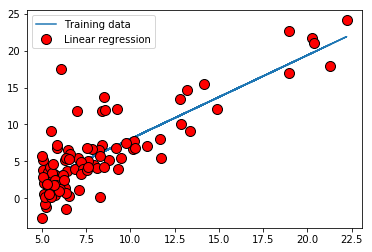

In [7]:
############################
##  Plot Regression Line  ##
############################

plt.figure()
plt.clf()
plt.plot(x_vec[:, 0], np.dot(x_vec, sq_weight), '-')
plt.plot(x_vec[:, 0],y,'ro', ms=10, mec='k')
plt.legend(['Training data', 'Linear regression'])
plt.draw()

### 1.C Use Absolute Function

Firstly, we add the given outliers points to the Input Array and the Output Array. The objective of this part is to compare results of Square Loss Func and Absolute Loss Func. Using a 'for' loop the outlier points are appended: 

In [8]:
## Add some Outliers points
outlier = [[17.5,0], [18.5,0], [19.5,0]]

for d in range(len(outlier)):

    x = np.append(x , [outlier[d][0]])
    y = np.append(y , [outlier[d][1]])


# Make a linear feature vector
x_vec = np.stack([x, np.ones(len(y))], axis=1)

The problem with Absolute Loss function is that it has no defined Gradient. Nevertheless, for this part we can use subgradient to proceed with the algorithm. Out of many possible sub-gradient we choose the one which gives Gradient $\nabla J(w^{(k)}$ as

$$
\nabla J(w^{(k)}) = x_j^{(i)} * sign(h_w(x^{(i)}) - y^{(i)})
$$

Accordingly, the function for computing gradient is changed as follows.

In [9]:
############################
##   Gradient Function    ##
##  (Absolute Loss Func)  ##
############################

def ab_gradient(x_vec,w,y):
    
    # Valid for Absolute loss only
    # See analytical solution
    ab_grad = x_vec*np.sign((np.dot(x_vec,w) - y))
    
    return ab_grad

In [10]:
def gradient_decent(x_vec,y,w,acc):
    global itr, m, error

    delta_w = np.array([1,1]) # initialized randomly

    itr = 0 # count iterations 

    # While loop until convergency is acheived
    while all(acc < abs(a) for a in delta_w):
        
        ab_g = 0

        # Compute Cumulative gradient
        for a in range(len(y)):

            # Gradient computation is Normalized by number of data points available
            ab_g = ab_g + ab_gradient(x_vec[a],w,y[a])/m
            a = a+1
        
        delta_w = alpha * ab_g
        # alpha is learning rate
        w = w - (delta_w)
        
        itr = itr+1
    
    return w, itr


ab_weight, ab_itr = gradient_decent(x_vec,y,w,acc)
print('The optimized weight vector is {}.'.format(ab_weight))
print('Solving criteria with Abs Loss Func: Convergency = {} and Learining Rate = {}'.format(acc,alpha))
print('Total iterations done = {}'.format(ab_itr))

The optimized weight vector is [ 0.95055254 -2.29845361].
Solving criteria with Abs Loss Func: Convergency = 0.0001 and Learining Rate = 0.01
Total iterations done = 2001


Changes in the main function can be reproduced easily. To plot both the regression lines in one plot we use the results of part B which are precomputed with outliers. This computation is not shown in this Notebook but can be easily reproduced by just adding Outliers and Solving Part B again. The following set of lines is to be un-commented and the result of weight vector is to be added. 

In [11]:
#From earlier part B. Uncomment the next line and substitute the values.

#If solved with Squared Loss with Outliers, then weight is: 
sq_weight = np.array([0.7260848  , -0.17531625])

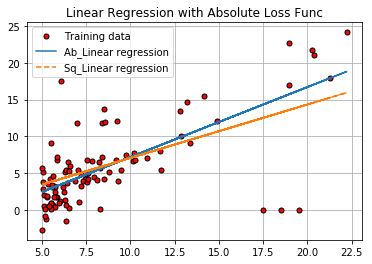

In [12]:
############################
##  Plot Regression Line  ##
############################

plt.plot(x_vec[:, 0],y,'ro', ms=5, mec='k')
plt.plot(x_vec[:, 0], np.dot(x_vec, ab_weight), '-')
plt.plot(x_vec[:, 0], np.dot(x_vec, sq_weight), '--')

plt.legend(['Training data', 'Ab_Linear regression', 'Sq_Linear regression'])
plt.grid(b=None, which='major', axis='both')
plt.title('Linear Regression with Absolute Loss Func')
plt.show()

### 1.D Observe Convergence

The interval of variation is given in the problem. We make a new variable that has all possible of Learning Rate as a list. Subsequently, for each one of these we solve with Gradient Descent algorithm and store the results of 'Iterations it took for convergence' in a list. Further this list can be plotted using matplotlib library. 

In [13]:
# Learning rate introduced as a parameter in function

def gradient_decent(x_vec,y,w,acc,alpha):
    global itr, m, error
    delta_w = np.array([1,1]) # initialized randomly
    itr = 0
    while all(acc < abs(a) for a in delta_w):       
        sq_g = 0
        # Compute Cumulative gradient
        for a in range(m):
            # Gradient computation is Normalized by number of data points available
            sq_g = sq_g + sq_gradient(x_vec[a],w,y[a])/m
            a = a+1
        delta_w = alpha * sq_g 
        # alpha is learning rate
        w = w - (delta_w)       
        itr = itr+1 
    return w, itr

print('Solving...........')

# Solve for list of learning rates
alphas = [0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02]

sq_weight = [0] * len(alphas)
sq_itr = [0] * len(alphas)

for b in range(len(alphas)):
    sq_weight[b], sq_itr[b] = gradient_decent(x_vec,y,w,acc,alphas[b])

Solving...........


Solved. See plot for variation.


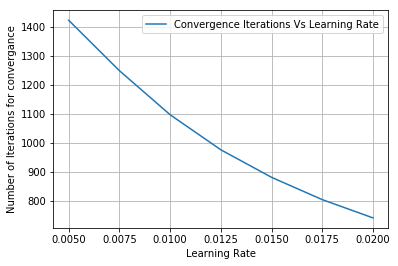

In [14]:
############################
##  Plot Iteration Var.   ##
############################

print('Solved. See plot for variation.')
plt.plot(alphas, sq_itr, '-')
plt.ylabel('Number of Iterations for convergance')
plt.xlabel('Learning Rate')
plt.grid(b=None, which='major', axis='both')
plt.legend(['Convergence Iterations Vs Learning Rate'])
plt.xticks(np.linspace(0.005, 0.02, 7))
plt.show()